<a href="https://colab.research.google.com/github/terrencekwon/data-science-portfolio/blob/master/covid19_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualizing the COVID-19 Pandemic

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-24-2020.csv'
df = pd.read_csv(path)

df.info()
df.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3255 non-null   float64
 1   Admin2               3260 non-null   object 
 2   Province_State       3782 non-null   object 
 3   Country_Region       3950 non-null   object 
 4   Last_Update          3950 non-null   object 
 5   Lat                  3870 non-null   float64
 6   Long_                3870 non-null   float64
 7   Confirmed            3950 non-null   int64  
 8   Deaths               3950 non-null   int64  
 9   Recovered            3950 non-null   int64  
 10  Active               3949 non-null   float64
 11  Combined_Key         3950 non-null   object 
 12  Incidence_Rate       3870 non-null   float64
 13  Case-Fatality_Ratio  3898 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 432.2+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-08-25 04:28:02,33.939110,67.709953,38054,1389,28360,8305.0,Afghanistan,97.753973,3.650076
1,NaN,NaN,NaN,Albania,2020-08-25 04:28:02,41.153300,20.168300,8605,254,4413,3938.0,Albania,299.013135,2.951772
2,NaN,NaN,NaN,Algeria,2020-08-25 04:28:02,28.033900,1.659600,41858,1446,29369,11043.0,Algeria,95.454970,3.454537
3,NaN,NaN,NaN,Andorra,2020-08-25 04:28:02,42.506300,1.521800,1060,53,877,130.0,Andorra,1371.901896,5.000000
4,NaN,NaN,NaN,Angola,2020-08-25 04:28:02,-11.202700,17.873900,2222,100,877,1245.0,Angola,6.760731,4.500450
5,NaN,NaN,NaN,Antigua and Barbuda,2020-08-25 04:28:02,17.060800,-61.796400,94,3,89,2.0,Antigua and Barbuda,95.988890,3.191489
6,NaN,NaN,NaN,Argentina,2020-08-25 04:28:02,-38.416100,-63.616700,350867,7366,256789,86712.0,Argentina,776.326956,2.099371
7,NaN,NaN,NaN,Armenia,2020-08-25 04:28:02,40.069100,45.038200,42825,854,36049,5922.0,Armenia,1445.211549,1.994162
8,NaN,NaN,Australian Capital Territory,Australia,2020-08-25 04:28:02,-35.473500,149.012400,113,3,110,0.0,"Australian Capital Territory, Australia",26.395702,2.654867
9,NaN,NaN,New South Wales,Australia,2020-08-25 04:28:02,-33.868800,151.209300,3991,52,2994,945.0,"New South Wales, Australia",49.162355,1.302932


Deleting unwanted columns

In [5]:
df = df.drop(columns=['FIPS', 'Admin2', 'Province_State', 'Last_Update', 'Combined_Key'])
df.head()

,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,Afghanistan,33.93911,67.709953,38054,1389,28360,8305.0,97.753973,3.650076
1,Albania,41.15330,20.168300,8605,254,4413,3938.0,299.013135,2.951772
2,Algeria,28.03390,1.659600,41858,1446,29369,11043.0,95.454970,3.454537
3,Andorra,42.50630,1.521800,1060,53,877,130.0,1371.901896,5.000000
4,Angola,-11.20270,17.873900,2222,100,877,1245.0,6.760731,4.500450


We are only interested in the total cases in each country, but our data set has the cases split up within each province/state. So we want to group the case counts by country.

In [6]:
country_totals = df.groupby('Country_Region').sum().reset_index()
country_totals.head(20)

,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,Afghanistan,33.939110,67.709953,38054,1389,28360,8305.0,97.753973,3.650076
1,Albania,41.153300,20.168300,8605,254,4413,3938.0,299.013135,2.951772
2,Algeria,28.033900,1.659600,41858,1446,29369,11043.0,95.454970,3.454537
3,Andorra,42.506300,1.521800,1060,53,877,130.0,1371.901896,5.000000
4,Angola,-11.202700,17.873900,2222,100,877,1245.0,6.760731,4.500450
5,Antigua and Barbuda,17.060800,-61.796400,94,3,89,2.0,95.988890,3.191489
6,Argentina,-38.416100,-63.616700,350867,7366,256789,86712.0,776.326956,2.099371
7,Armenia,40.069100,45.038200,42825,854,36049,5922.0,1445.211549,1.994162
8,Australia,-256.850200,1130.843900,25053,525,19601,4927.0,483.243994,14.766837
9,Austria,47.516200,14.550100,25495,733,21657,3105.0,283.076479,2.875074


Countries with the most confirmed COVID-19 cases:

In [7]:
most_cases = country_totals.sort_values(by='Confirmed', ascending=False)
most_cases

,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
174,US,121304.879267,-292282.371694,5739724,177252,2020774,3541621.0,4.190753e+06,7031.195624
23,Brazil,-342.077100,-1308.973300,3622861,115309,2976256,531296.0,6.504116e+04,75.044277
79,India,831.177882,2945.020567,3167323,58390,2404585,704348.0,1.038969e+04,40.879053
140,Russia,4527.343882,5156.031399,959016,16406,771357,171253.0,5.375811e+04,111.088654
156,South Africa,-30.559500,22.937500,611450,13159,516494,81797.0,1.030962e+03,2.152097
...,...,...,...,...,...,...,...,...,...
50,Dominica,15.415000,-61.371000,20,0,18,2.0,2.778125e+01,0.000000
142,Saint Kitts and Nevis,17.357822,-62.782998,17,0,17,0.0,3.195969e+01,0.000000
75,Holy See,41.902900,12.453400,12,0,12,0.0,1.483313e+03,0.000000
184,Western Sahara,24.215500,-12.885800,10,1,8,1.0,1.674116e+00,10.000000


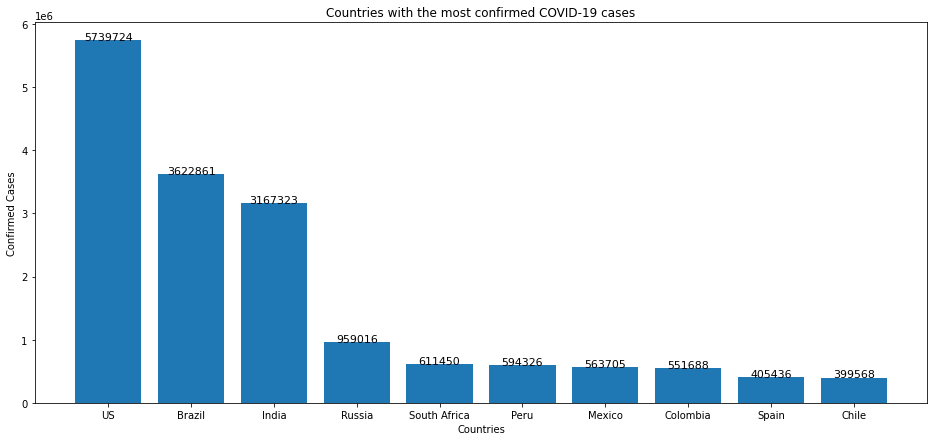

In [47]:
countries = most_cases['Country_Region']
confirmed_cases = most_cases['Confirmed']
fig = plt.figure(figsize =(16, 7))
plot = plt.bar(countries[0:10], confirmed_cases[0:10]) 
plt.title('Countries with the most confirmed COVID-19 cases')
plt.xlabel('Countries')
plt.ylabel('Confirmed Cases')
for index, value in zip(countries[0:10], confirmed_cases[0:10]):
    plt.text(index, value, str(value), ha = 'center', fontsize=11)